# References

- Trustworthy Machine Learning Lecture at the University of Tübingen. 
Winter Semester 2023/2024. https://www.youtube.com/playlist?list=PL05umP7R6ij0FDHxle4CQLkzOfN-PAt7b ***
- Mucsányi B, Kirchhof M, Nguyen E, Rubinstein A, Oh SJ. Trustworthy Machine Learning 2023. ***




# Trustworthy Machine learning 1: OOD generalization

![](images/image.png)

# Introduction

> **Are we done with ML? Is there anything else to research?**

## Limitation

- Dataset: data collection is quite expensive
    - Collect yourself
    - Use Public data
    - Buy Data
- Resource
    - Hardware
    - Human Resource
- It dose not work
    - Given the same distribution of data, ML models can generalized well
    - However, if new situation (not the same distribution). The model will not work.
- ML model is not **trustworthy**, especially if the task is related to your life.
    - Imagine 10 AI doctors that you have cancer, will you start treatment without consulting human doctor?
    - Hallucination

## Research Topics in Trustworthy AI

1. Out of distribution (ODD) generalization: Can we train the model to work well beyond the training distribution?
2. Explainability: Can we make a model explain itself?
3. Uncertainty: Can we make a model know when it dose not know?
4. Evaluation: How to quantify trustworthiness?
5. Fairness: Demographic disparity and use of sensitive attributes.
6. Causality
7. Privacy and security: How to keep data safe?
8. Abuse of AI tools: Deepfake
9. Environmental concern: GPU consumes a lot of energy
10. Governance and Ethic: Regulation around the use of AI

# Motivation

## Challenges of AI in medicine

- Data Availability: Deep learning models require large, high-quality datasets. In contrast, medical datasets are usually much smaller, consisting of 100-70,000 samples.
- Data Integration: Combining datasets from multiple centers is challenging. Models may struggle to generalize across institutions with different data distributions.
- Biased dataset: Imaging procedures can introduce measurement biases, such as dermatologist markings in skin lesion images.

![skin.png](images/skin.png)

ref image: Winkler JK, Fink C, Toberer F, Enk A, Deinlein T, Hofmann-Wellenhof R, Thomas L, Lallas A, Blum A, Stolz W, Haenssle HA. Association between surgical skin markings in dermoscopic images and diagnostic performance of a deep learning convolutional neural network for melanoma recognition. JAMA dermatology. 2019 Oct 1;155(10):1135-41.

![alt text](images/cxr.png)

Pneumothorax detection 0.87 AUC

Down to 0.77 when removed

Chest drain mean patient already treated

- Explainability: Many AI models, particularly deep learning, operate as "black boxes,"  making it difficult to interpret.
- Uncertainty quantification: “Knowing When They Don't Know”
- Generalization: Models often struggle to perform well on new, unseen data outside of the training distribution.
- Fairness: Imbalanced datasets reflecting specific populations can lead to biased predictions, potentially harming underrepresented groups.

![fairness_cv.png](images/fairness_cv.png)

Gijsberts CM, Groenewegen KA, Hoefer IE, Eijkemans MJ, Asselbergs FW, Anderson TJ, Britton AR, Dekker JM, Engström G, Evans GW, de Graaf J. Race/ethnic differences in the associations of the Framingham risk factors with carotid IMT and cardiovascular events. PloS one. 2015 Jul 2;10(7):e0132321.

![fairness_pulse.png](images/fairness_pulse.png)

Sjoding MW, Dickson RP, Iwashyna TJ, Gay SE, Valley TS. Racial bias in pulse oximetry measurement. New England Journal of Medicine. 2020 Dec 17;383(25):2477-8.

## Solving "What" is not enough

![](images/car.png)

## The "how" part of the problem

![](images/car1.png)

You dont know whether the model learn "Road" or "Car"

![](images/car2.png)

## Shifted focus in ML: "how" problems.

Synthetic dataset: extracted foreground and randomly change the background

![](images/how_Cv.png)

J. Djolonga et al., “On robustness and transferability of convolutional neural networks,” 2021 IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR), pp. 16453–16463, Jun. 2021. doi:10.1109/cvpr46437.2021.01619 

![](images/how_LLM.png)

Wei, J., Wang, X., Schuurmans, D., Bosma, M., Ichter, B., Xia, F., Chi, E., Le, Q., & Zhou, D. (2022, January 28). Chain-of-Thought prompting elicits reasoning in large language models. arXiv.org. https://arxiv.org/abs/2201.11903

# OOD Generalization

#### What is Generalization?

![](images/gen.png)

![](images/gen2.png)

#### Why we need OOD Generalization

https://www.youtube.com/watch?v=sbSDsbDQjSU

![](images/reason_ood.png)

![](images/reason_ood2.png)

OOD generalisation is required when development environment does not fully reflect the deployment environment.

![](images/ood.png)

#### Development stage and Deployment stage

**Development stage**

- Stage for preparing ML model for deployment.
- Development resources: Labelled samples (X,Y)

**Deployment stage**
- Actual users use the ML model prepared in the dev stage.
- Common to keep track of performance measurement in deployment stage.
- Deployment environment: Unlabelled samples X 

**In Practice**

The boundary between development and deployment stages can often blur.
Deployed models may be continuously updated by leveraging feedback or data from the deployment stage to refine the model iteratively.

#### Simulating a real world ML setting via data splits

![](images/split.png)

- Train: Dev samples where the model parameters are updated.
- Val: Dev samples on which hyperparameters and discrete design choices are made.
- Test: Testing is a lab setup designed to mimic the deployment scenario closely.

**Practice point of view on Testing**: 
- This is different from deployment and still a part of development.
- As soon as we have labeled samples from deployment (and we make any design choices based on these or just test our model), we are using information from the deployment setup in dev. We cannot talk about true (domain or task) generalization anymore. The deployment scenario should stay unobserved in such settings. 

**Academia point of view on Testing**
- The test set and the action of testing is treated as a part of the deployment.

ML becomes arbitrarily easier if information from deployment stage is available during development.

- Easy: Unlimited number of samples from the deployment distribution (ID generalisation).
- Medium: Just a few samples from the deployment data distribution.
- Hard: Broad language description of the type of data (e.g. city views).
- Very hard: No information at all.

> As such, (train+val) and test must be strictly separated.

![](images/split2.png)

#### Common knowledge

- Train (Trainable parameters)
    - (Usually) Used for tuning parameters through gradient-based optimisers.
    - Optimisation objective is to achieve a good fit to the training data.
- Val (Hyperparameters)
    - Used for tuning a few hyperparameters and design choices through optimisation, e.g. grid / random / bayesian optimiser.
    - Achieve good generalisation on the “Val” split after training on “Train”.


#### Note: Evaluation paradox


![](images/paradox.png)

For clean experiment, deployment data must be hidden from the developers.
But without deployment data, you can never confirm how well you’re addressing the problem, especially for OOD generalisation.


![](images/paradox2.png)

As soon as you evaluate on deployment data, however small the portion is, you leak the information to the development stage, possibly distorting the performance metric.

Once any information from deployment data leaks, corresponding deployment data are now part of development environment by definition.

## Task, Domain and Cue

### Task

![](images/task.png)

ref: https://www.researchgate.net/figure/Computer-vision-tasks-Adapted-from_fig5_346091812

![](images/task2.png)

ref: https://subscription.packtpub.com/book/application-development/9781788478311/1/ch01lvl1sec11/tasks-of-natural-language-processing

![](images/task3.png)

ref: https://www.researchgate.net/figure/The-color-map-of-20-pre-specified-object-classes-of-Pascal-VOC-2010-8_fig1_281717283

Even within “classification”, there exists a diversity of tasks



### Cue

> Cues = features = attributes

Cues, features, and attributes all refer to the factors of variations in the data sample.

![](images/cue.png)

- Cue/Feature: Any factor of variation within data. Cues are inherent to the data.

- Task: The factor of variation that matters for you. The factor that you need to recognise at deployment. Tasks are not inherent to the data; it needs to be defined by a human.

Example: 

- Task: Shape classification
- Cue: Cue 2


### Domains

Domains = Environments 

![](images/domain.png)

#### Example of OOD generalization problem

![](images/domain2.png)

## Common Settings related/similar to OOD Generalization

**Different Domain/Distribution Settings**

- In-Distribution (ID) Generalization
- Out-of-Distribution (OOD) Generalization
- Domain adaptation
- Domain generalisation
- Test-time training
- Continual learning

**Different Task Settings**

- Transfer learning
- K-shot learning
- Meta-Learning
- Continual learning




#### ID Generalization
![](images/id_gen.png)

- In-Distribution (ID) Generalization: The model performs well on data that follows the same distribution as the training data.
- Example: A model trained on handwritten digits (e.g., MNIST dataset) and evaluated on similar handwritten digits from the same population.

#### OOD Generalization

![](images/ood_gen.png)

![](images/gen.png)

- In cross-domain generalization, the deployment environment contains completely unseen cues in dev. 
- In cross-bias generalization, deployment contains unseen compositions of seen cues in dev. 
- Adversarial generalization considers a (real/hypothetical) adversary in deployment who tries to choose the worst-case domain.

#### Domain Adaptation

![](images/da.png)

- Access to Target Domain Samples: During development, we have some labeled or unlabeled samples from the deployment environment.
- Feature Alignment: Align feature distributions with target domain statistics to bridge the gap between source and target domains.

![](images/da2.png)

**Idea**

- Apply penalties, such as an L2 penalty on differences between domain statistics (e.g., sample mean and variance).
- Alternatively, use distance metrics as a penalty to measure the similarity between distributions.

#### Domain Generalization

![](images/dg.png)

- During the dev stage, we have access to labeled samples from multiple domains. We also know the domain label for every sample.
- Aim is to “unlearn” domain-related characteristics in your representation by performing domain statistic matching similarly to domain adaptation.


#### Test-Time Training

![](images/ttt.png)

- After training your model, you keep updating your model according to the unlabelled samples from the deployment environment.
- Dev continues even into the deployment in the sense that your model keeps getting updated.

#### Domain-Incremental Continual Learning

![](images/cl.png)

- Domains are added over time.

#### Transfer learning

![](images/tl.png)

- Use pretrained model (on upstream task) & **fine tune** it to the target (downstream) task. → Improve performance for target task.
- Transfer learning can involve transferring knowledge across *different domains* as well as different tasks. Domain adaptation is a subcategory of transfer learning.

**In practice**

- Computer vision:
    - Timm models: https://github.com/huggingface/pytorch-image-models, https://huggingface.co/timm
    - Pytorch models: https://pytorch.org/vision/stable/models.html
- Natural langauge processing
    - Huggingface models: https://github.com/huggingface/transformers, https://huggingface.co/docs/transformers

**Varying degrees of tuning for the downstream**

- Fine-tuning
    - Further fit all trainable parameters for the downstream task.
    - LoRA for lightweight tuning. 
- Partial tuning
    - Last-layer tuning 
- No tuning
    - K-nearest neighbour classifier (Distance comparison)



#### K-Shot Learning

![](images/k_shot.png)

- We learn to fit our model to the deployment task using a large number of task 1 samples and a few number of data (K × number of class) from task 2 samples.
- Key Goal: Adapt to a new task with minimal examples, often by transferring knowledge from a larger dataset or through pre-trained models.

- **Zero-shot learning**: The model encounters a completely new task during deployment, one it has not seen in development, and must rely on prior knowledge or task descriptions to perform.

    - Large Language Models (LLMs): These models use zero-shot prompting, where they can perform tasks based on natural language descriptions without explicit training on those tasks. For instance, a chatbot can answer trivia questions it hasn't been trained on by leveraging general knowledge encoded during training.
    - CLIP: CLIP can recognize images based on textual labels it has not explicitly seen during training, enabling zero-shot recognition by connecting visual and textual representations.

**Challenges in True Zero-Shot Evaluation**

- Benchmark Limitations: It’s difficult to guarantee that benchmarks for zero-shot tasks are genuinely new for LLMs. Due to the vast scope of data in their training, we cannot be certain a model hasn’t seen a similar task before.

#### Meta-learning
![](images/meta.png)

- Meta-learning, or "learning how to learn," is an approach where the model is trained to quickly adapt to new tasks.
- It focuses on enabling the model to learn more efficiently with limited data, making it highly suitable for few-shot learning tasks.
- Key Goal: Teach the model to become better at learning, by exposing it to many tasks so it can discover general strategies for quick adaptation.

#### Task-Incremental Continual Learning

![](images/ticl.png)

- Another type of continual learning (CL) is task-incremental learning.
- Tasks are added over time. You label a few samples over time.




#### ML settings in the era of foundational models


![](images/foundation.png)

- Training set is massive (billions-trillions of tokens).
- Deployment environment is already very likely to be part of development environment.
- Is this a problem? 
    - In practice, not really - one could see LLM as a large, efficient, and untrustworthy DB.
    - In academic studies & benchmarking, perhaps it is a problem - unfair comparisons.


#### Example What is real-world scenario for this?

- Development resources
    - Multiple image datasets D1, D2, D3, …, Dn with the same task (classification with the same set of labels Y). Each dataset consists of IID samples from distributions P1, P2, …, Pn, but each dataset follows a different distribution: Pi ≠ Pj for all i ≠ j. Every sample is labelled in each dataset.
    - For each image, you know which dataset it belongs to.
    - You have collected a few unlabelled samples Dn+1 from the deployment environment Pn+1.
- Deployment environment
    - The stream of inputs follow the distribution Pn+1. This distribution is different from those of the training datasets: Pi ≠ Pn+1 for all i=1,...,n.
- Example real-world scenario for this?


![](images/dg.png)

- According to the “domain generalisation” definition above, information about Domain 4 must not be available during development.
- When it is available, you can’t call it a “domain generalisation” anymore.

#### Leakage examples

- Some hyperparameters are chosen based on labeled samples from domain 4. In a sense, our dev set is partly taken from domain 4.
- The model is trained on labeled samples from domains 1-3 and unlabeled samples from domain 4, we are performing *domain adaptation*, not domain generalization.
- Information Leakage from Domain Generalization Evaluation
    - It’s common to evaluate the model on labeled samples from Domain 4 to measure performance in a new deployment environment. However, as soon as we use Domain 4 for evaluation, we are no longer strictly in a domain generalization setting, since the model has interacted with the target domain.
    - Evaluating domain generalization models on benchmarks is paradoxical, as it often involves repeated observations of the target domain. While researchers continue to evaluate methods on domain generalization benchmarks, this practice technically introduces leakage but is necessary for measuring progress and effectiveness.


#### Solutions to Information Leakage

- Select hyperparameters within development resources.
- Use the test set once per project. By using a specific test set multiple times, we can always overfit to it. If our goal is to go towards a distribution outside dev, then evaluating on the test set multiple times can be harmful.
- Update benchmarks.

### OOD Generalization

- Cross-domain generalization: the deployment environment contains completely unseen cues in dev. 
- Cross-bias generalization: deployment contains unseen compositions of seen cues in dev. 
- Adversarial generalization: considers a (real/hypothetical) adversary in deployment who tries to choose the worst-case domain.

#### Cross-domain generalisation benchmarks

![](images/dg_bench.png)

- The PACS Dataset: The PACS dataset considers four domains: Photos, Art Paintings, Cartoons, and Sketches: https://arxiv.org/abs/1710.03077
- DomainBed: Combination of some popular DG benchmarks
- The Wilds Benchmark: https://proceedings.mlr.press/v139/koh21a.html
- ImageNet-C: Simulated corruptions under deployment scenario: https://github.com/hendrycks/robustness

#### What makes CDG difficult?

![](images/dif.png)

- Ill-defined behaviour on novel domains. 
    - The model does not know what to do in regions without any training data.
    - This problem can be addressed through uncertainty quantification (eg. “know when it does not know”).
- Wrong choice of cues
    - Spurious correlation: A spurious correlation is the co-occurrence of some cues, features, or labels, which happens in the development stage but not in the deployment stage. (All cue, color, shape achieving 100% acc in development stage)







# Cue selection problem

### Cross-bias generalisation

- Bias cue is a cue that is not integral or causal for the task, but is nonetheless (spuriously) correlated with the task.
- Solution is to select the right cue (feature).
    - A model under the vanilla OOD generalisation setting lacks the information to generalise well for an arbitrary deployment task.
    - To select the right feature for the task, more information is needed.

### Shortcut bias

ML model chooses easier cue for achieving 100% accuracy under the underspecified setting.

E.g. according to Scimeca et al. 2022, Color > Shape in the order of preference. 

> Shortcut bias: Models’ inborn preference for “simpler” cues.

ref:
- Which Shortcut Cues Will DNNs Choose? A Study from the Parameter-Space Perspective. ICLR 2022.
- Underspecification Presents Challenges for Credibility in Modern Machine Learning. JMLR 2021.
- Shortcut Learning in Deep Neural Networks. Nature Machine Intelligence 2020.

> This help deep learning generalizes because the parameter-function map is biased towards simple functions. (Valle-Perez et al. 2019)

ref: Deep learning generalizes because the parameter-function map is biased towards simple functions. ICLR 2019.

#### Shortcut bias Problems

- For ID generalisation tasks, simple cues are often sufficient for generalisation.
- For OOD generalisation tasks, simple cues may not work anymore.
- For fairness, simple cues may not be ethical to use.

#### Context bias example


![](images/bias.png)

ref: Not Using the Car to See the Sidewalk — Quantifying and Controlling the Effects of Context in Classification and Segmentation. CVPR 2019.

The task cues are the foreground objects, but a classifier focusing on the background context bias cues can achieve high accuracy when the background is highly correlated with the foreground.

#### Texture bias example

![](images/bias2.png)

ref: ImageNet-trained CNNs are biased towards texture; increasing shape bias improves accuracy and robustness. ICLR 2019.


Training a cat/dog classifier on a diagonal dataset, where the texture and shape are highly correlated. At test time, we want to predict cats when changing their texture (e.g., to greyscale, silhouette, edges, or to a marginally different texture).

- When only the true texture of the original object (cat) is presented, models stay perfectly accurate while humans make more mistakes (90% accuracy).
- Networks are prone to be biased towards textures because it is much easier to learn. If the task is ‘shape’, such networks will generalize poorly to no/different textures.

### Cue/Feature selection problem in fairness


**What is Fairness?**

In the context of equality of opportunity, fairness can be seen as a form of individual fairness: people who are similar with respect to a task should be treated similarly. Decision-makers (or models) should avoid differential treatment based on attributes like race, gender, or other characteristics, assuming these attributes are irrelevant to the task.

**Fairness and Feature Selection**

This is where the feature selection problem comes in:

- Task Cue: Features that are directly relevant and causally linked to the task.
- Bias Cue: Features that are correlated with the task but are not causally relevant (e.g., demographic attributes that may introduce bias).

#### Example

**ML-based credit evaluation system.**

- Task: Predict possible future defaults for each individual.

- Task cues: Size of the loans, history of repayment, income level, age, etc.

- Bias cues (or sensitive attributes): Disability, gender, ethnicity, religion, …

When an ML system learns to use bias cues to predict credit risks, the model is not fair. The ML system requires further guidance to not use the sensitive cues



## Solution: Feature selection with extra information


![](images/cue_problem.png)

### Scenario 1: Simple data balancing

![](images/1_weight.png)



- A bit of unbiased samples in dev resources (e.g. α=1%) and we know which sample are bias/unbias (bias label avaliable).
- When trained, you may give more weight to unbiased sample in loss function

ref: Idrissi, B. Y., Arjovsky, M., Pezeshki, M., & Lopez-Paz, D. (2021, October 27). Simple data balancing achieves competitive worst-group-accuracy. arXiv.org. https://arxiv.org/abs/2110.14503


### Scenario 1: Domain-adversarial neural network

![](images/dann.png)

ref: Domain-adversarial training of neural networks. JMLR 2016.


The idea of the method is to add an additional head to the model (magenta in the image) that would predict bias labels (named domain labels in the paper) and adversarially train a feature extractor (green in the image) such that the features it extracts are maximally noninformative for the additional head to predict bias labels but still informative for the original head (blue in the image) to solve the main task.

### Scenario 2

**Problem Setup**

- Abundant biased samples, few unbiased samples.
- No bias label → Don’t know which samples are biased.

To solve scenario 2, we need some assumption.

We previously know a shortcut bias that simple cue may selected. Therefore, we may assume that:

- Bias is the first cue that is learned by a generic model.
- Bias is the cue that is learned by a model of certain limited capacity
    - small model
    - CNN with smaller receptive field
    - Transformer with shallow depth
    - The model is trained for a small number of epochs

![](images/2.png)

**“Be Different” Supervision:**

“Be different” supervision is a type of regularization that forces the final model to be different from the intentionally biased model.

### Scenario 2: Learning from Failure

![](images/2_lff.png)

ref: Learning from Failure: Training Debiased Classifier from Biased Classifier. NeurIPS 2020.


![](images/2_lff_eq.png)

- Samples with high W(x) (Relative difficulty is high): Ones that the biased model cannot handle well.
- Assume: Samples with high W(x) are unbiased ones. 
- Your final model is trained with the sample-wise weight W(x) on the loss.

### Scenario 2: ReBias: Representational regularization

**Concept**: Create intentionally biased CNNs by reducing receptive fields, limiting them to local (e.g., texture-based) cues.

![](images/bias3.png) ![](images/bias4.png)

- Large Receptive Fields capture both local and global features.
- Small Receptive Fields restrict capture to local features only.

![](images/3_rebias.png)

ref: Learning De-biased Representations with Biased Representations. ICML 2020


Using a similar “Be Different” approach, ReBias enforces statistical independence rather than sample weighting, measured with **HSIC (Hilbert-Schmidt Independence Criterion)**.

![](images/3_rebias2.png)

The property of this function is if $U$ and $V$ are independent, the HSIC is zero.



Suppose we have two models, our final model $f$ and the intentionally biased model $g$, we want to enforce statistical independence $f (X) ⊥⊥ g(X)$ to ensure that the model $f$ we find is not equivalent to some other network $g$ with a small receptive field.

#### Optimization

**Intentionally biased model**

Intentionally Biased Model: Train a model constrained to capture local cues.

![](images/3_rebias3.png)

**Final model**

Final Model: Train a more comprehensive model with loss minimization that reduces similarity to the biased model g.

![](images/3_rebias4.png)

During training, we update f once, then update g for a fixed f n times (n = 1 in the official implementation). There also many other options, eg., training f and g together on the same loss value.

![](images/3_rebias5.png)

During the optimization procedure, g tries to catch up to f (solve the task and maximize dependence). In turn, f tries to be different (run away) from g (solve the task and minimize dependence). Eventually, after doing this for a few iterations, f finally escapes the set of models G. Thus, no function in G can represent f anymore (due to the architectural constraint), and f cannot leverage the simple cue that g uses. Now, e.g., f looks at global shapes instead of texture: f becomes debiased.

#### Evaluation on Action recognition

![](images/3_rebias6.png)

- Pure actions without background


![](images/3_rebias7.png)

Train 3D CNN as final model and 2DCNN as intentionally bias model.

![](images/3_rebias8.png)

### Scenario 3

**Problem Setup**

In this Scenario, all samples are bias (all cue correlated with task).

![](images/3.png)

In such a case, we can train multiple models with diverse OOD behaviors, i.e., that have substantially different decision boundaries in the input space. We select the best-performing model on the test dataset (which is usually very small in size), e.g., based on accuracy.

![](images/3_2.png)

![](images/3_3.png)

**Idea**

1. Train an ensemble of models with some diversity regularization
2. At test time, use a few labelled samples or human inspection to select the appropriate model that generalises well.

![3_manifold.png](images/3_manifold.png)

The intuition behind this method is that diverse ensemble training can be achieved by enforcing “independence” between models through the orthogonality of input gradients.


![](images/3_4.png)

One way to achieve this is to add an orthogonality constraint to the loss. Such a constraint can be represented as the squared cosine similarity of the input gradients for the same input

***Intuition***

Suppose that we have two models, m1 and m2, and two different regions of the image: background and foreground. If m2 is looking at the background, there is a significant focus on the background parts in the input gradient. We want the input gradient of m1 to be orthogonal to that of m2, as that will result in m1 focusing more on the foreground.

# Explanable AI

## Activation Maximization (Optional)

- (original) https://www.researchgate.net/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network
- https://christophm.github.io/interpretable-ml-book/cnn-features.html
- https://distill.pub/2017/feature-visualization/

GoogleNet layer 3a

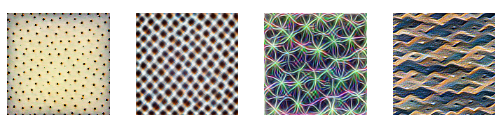

GoogleNet layer 4b

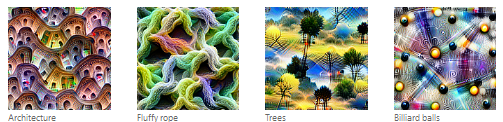

GoogleNet layer 5b

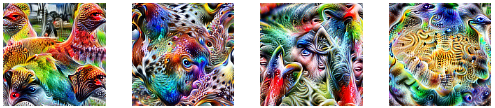

The approach of making the learned features explicit is called Feature Visualization. Feature visualization for a unit of a neural network is done by finding the input that maximizes the activation of that unit.

“Unit” refers either to individual neurons, channels (also called feature maps), entire layers or the final class probability in classification (or the corresponding pre-softmax neuron, which is recommended). Individual neurons are atomic units of the network, so we would get the most information by creating feature visualizations for each neuron. But there is a problem: Neural networks often contain millions of neurons. Looking at each neuron’s feature visualization would take too long. The channels (sometimes called activation maps) as units are a good choice for feature visualization. We can go one step further and visualize an entire convolutional layer. Layers as a unit are used for Google’s DeepDream, which repeatedly adds the visualized features of a layer to the original image, resulting in a dream-like version of the input.

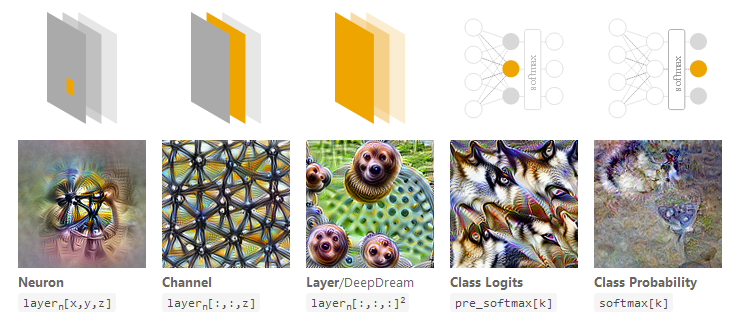

Concept is to find and input image $X$ that maximize the chosen unit $a(X, θ)$

$$
\text{img} = \text{argmax}_X a(X, θ)
$$

The simple example to find img is try to optimized $X$, start by the random noise, and update $X$ by gradient.

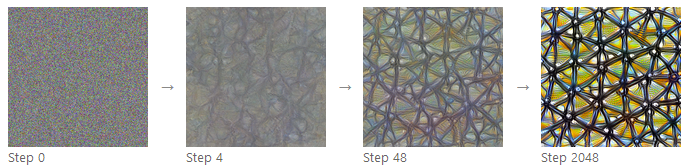

## CAM-based methods

### Class activation map (CAM)

https://arxiv.org/abs/1512.04150

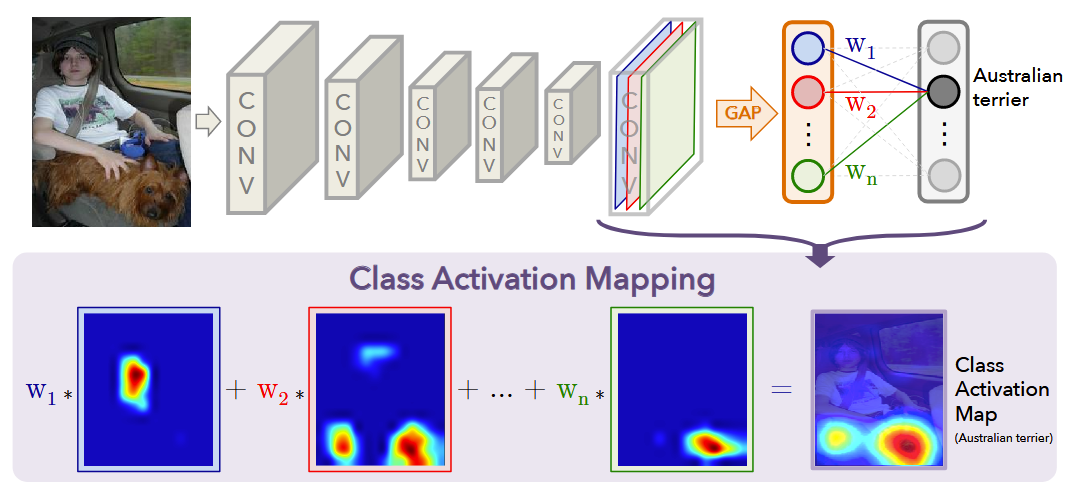

Global average pooling (GAP)

https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html

The GAP is layer for average all value in a channel and output single value for each channel.  $(N,C,H_{in},W_{in}) \to (N,C)$

CAM define a maps, $M_c$, for the activation map in class $c$ as

$$
map_{c,i,j} =  \sum_k^n w_{k,c} A_{k,i,j}  
$$

for $w_{k,c}$ is the weight for neuron $k$ in last layer that output a value to predict class $c$. and $A_k$ is the activation output before Global average pooling (GAP) layer.

$$
y_c = \sum_k w_{k,c} \sum_{i=1}^m \sum_{j=1}^n A_{k,i,j}
$$
$map$ will be resize to match the original image when visualized

### Summary

- Does not required backpropagation
- Need to have Global average pooling (GAP)
- Need to retrained the network

### Gradient-weight CAM (Grad-CAM)

Gradient-weighted Class Activation Map (Grad-CAM) is
a generalization CAM using the gradients of the network output with respect to the last
convolutional layer to achieve the class activation map. This allows Grad-CAM to be applicable to a broader range of CNNs compared to CAM, only requiring that the final activation
function used for network prediction to be a differentiable function.

$$
map_{c,i,j} = ReLU [ \sum_k^n w_{k,c} A_{k,i,j}  ]
$$

For $w_{k,c}$ is the gradient, calculated by

$$
w_{k,c} = \frac{1}{m \cdot n} \sum_{i=1}^m \sum_{j=1}^n
\frac{\partial y_c}{\partial A_{k,i,j}}.
$$

For $y_c$ is the output of class $c$ and $A_{k,i,j}$ is the output of the interested convolutional layer at neuron $k$ position at $(i,j)$.

In [1]:
!wget https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01443537_goldfish.JPEG

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision.models import resnet50
import torchvision.transforms as transforms
%matplotlib inline

# open method used to open different extension image file
im = cv2.imread("./n01443537_goldfish.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im = cv2.resize(im, (224,224))

# This method will show image in any image viewer
plt.imshow(im)
im = im/255

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
input_tensor = transform(im).float()
input_tensor = input_tensor.unsqueeze(0)

model = resnet50(pretrained=True)

In [ ]:
# defines two global scope variables to store our gradients and activations
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
  global gradients # refers to the variable in the global scope
  print('Backward hook running...')
  gradients = grad_output
  # In this case, we expect it to be torch.Size([batch size, 1024, 8, 8])
  print(f'Gradients size: {gradients[0].size()}')
  # We need the 0 index because the tensor containing the gradients comes
  # inside a one element tuple.

def forward_hook(module, args, output):
  global activations # refers to the variable in the global scope
  print('Forward hook running...')
  activations = output
  # In this case, we expect it to be torch.Size([batch size, 1024, 8, 8])
  print(f'Activations size: {activations.size()}')

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html
forward_hook = model.layer4[-1].register_forward_hook(forward_hook, prepend=False)
backward_hook = model.layer4[-1].register_full_backward_hook(backward_hook, prepend=False)

In [ ]:
model(input_tensor)
print()

In [ ]:
output_class = 1
model(input_tensor)[0, output_class].backward()

In [ ]:
alpha = gradients[0].mean(dim = (2, 3))
alpha = alpha.unsqueeze(-1)
alpha = alpha.unsqueeze(-1)

alpha.shape

In [ ]:
map = F.relu((alpha*activations).sum(dim = (0, 1)))
map = map.detach().cpu().numpy()
map = map/map.max()
map.shape

In [ ]:
plt.imshow(map)

In [ ]:
img = cv2.imread("./n01443537_goldfish.JPEG")
img = cv2.resize(img, (224,224))
map_resize = cv2.resize(map, (img.shape[1], img.shape[0]))
map_resize = np.uint8(255 * map_resize)
map_resize = cv2.applyColorMap(map_resize, cv2.COLORMAP_JET)
superimposed_img = map_resize * 0.4 + img
cv2.imwrite('./map.jpg', superimposed_img)

In [ ]:
superimposed_img = cv2.imread("./map.jpg")
superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
plt.imshow(superimposed_img)

#### Using grad-cam library

In [ ]:
!pip install grad-cam

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchvision.models import resnet50
import torchvision.transforms as transforms
%matplotlib inline

# open method used to open different extension image file
im = cv2.imread("./n01443537_goldfish.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (224,224))
# This method will show image in any image viewer
plt.imshow(im)
im = im/255

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
input_tensor = transform(im).float()
input_tensor = input_tensor.unsqueeze(0)

model = resnet50(pretrained=True)

In [ ]:
import torch
import torchvision.transforms as transforms

from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

target_layers = [model.layer4[-1]]


# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

targets = [ClassifierOutputTarget(1)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(im, grayscale_cam, use_rgb=True)
plt.imshow(visualization)
# You can also get the model outputs without having to re-inference
model_outputs = cam.outputs
print(f"output {model_outputs.argmax()}")